# **Overview of Cat vs Dog Image Classifier**

This code is a comprehensive script for building and evaluating an image classification model to differentiate between images of cats and dogs. The key steps are as follows:

### 1. Importing Libraries
Essential libraries for data manipulation (pandas, numpy), image processing (cv2, glob), visualization (matplotlib, seaborn), deep learning (tensorflow, keras), and system operations (os, tqdm) are imported.

### 2. Mounting Google Drive
Google Drive is mounted to access the dataset stored there.

### 3. Loading and Inspecting the Dataset
- The dataset directories for training and validation are defined and listed to understand the data structure.
- The dataset paths and their corresponding labels are collected into a dataframe.
- A count plot visualizes the distribution of labels (cat vs. dog) in the dataset.

### 4. Data Preparation
- The training data is split into training and validation sets using TensorFlow's `image_dataset_from_directory` method with a validation split.
- Images are resized to 224x224 pixels and batched.

### 5. Data Visualization
Sample images from the training dataset are visualized along with their labels to get a sense of the data.

### 6. Model Building
- An EfficientNetV2B1 pre-trained model is loaded without the top layers, and its weights are frozen to prevent updating during training.
- A new model is constructed using Keras Sequential API, adding the base model, a Flatten layer, a Dropout layer, and a Dense output layer with softmax activation.

### 7. Model Compilation and Callbacks
- The model is compiled with Adam optimizer and sparse categorical cross-entropy loss.
- Model checkpoints and early stopping callbacks are defined to save the best model and prevent overfitting.

### 8. Model Training
- The model is trained on the training dataset with validation on the validation dataset, using the defined callbacks.

### 9. Model Evaluation
- The trained model's performance is evaluated on the validation dataset.
- Training and validation loss and accuracy are plotted for visualization.

### 10. Testing on Unseen Data
- The model is evaluated on a separate test dataset to determine its final performance.
- Loss and accuracy on the test dataset are printed.

### 11. Saving the Model
- The trained model is saved to a file (`catvsdog.h5`) for later use.

### 12. Predicting New Images
- A function is defined to load and preprocess a new image, make a prediction using the trained model, and display the input image along with the predicted class label.
- An example image is loaded, preprocessed, and predicted, with the result printed and the image displayed.

### Summary
This script covers the full pipeline for image classification, including data loading, preprocessing, model building, training, evaluation, saving the model, and making predictions on new data. It leverages TensorFlow and Keras for deep learning, with visualization using matplotlib and seaborn.

In [20]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#Create Files_Name
image_data='/content/drive/MyDrive/Cat and dog/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,dog
2,cat


In [23]:
#Create Files_Name
image_test_data='/content/drive/MyDrive/Cat and dog/val'
pd.DataFrame(os.listdir(image_test_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,cat
2,dog


In [24]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/Cat and dog/train/dog/e...,dog
1,/content/drive/MyDrive/Cat and dog/train/cat/R...,cat
2,/content/drive/MyDrive/Cat and dog/train/cat/A...,cat
3,/content/drive/MyDrive/Cat and dog/train/dog/h...,dog
4,/content/drive/MyDrive/Cat and dog/train/dog/y...,dog
...,...,...
270,/content/drive/MyDrive/Cat and dog/train/cat/B...,cat
271,/content/drive/MyDrive/Cat and dog/train/dog/h...,dog
272,/content/drive/MyDrive/Cat and dog/train/dog/h...,dog
273,/content/drive/MyDrive/Cat and dog/train/cat/A...,cat


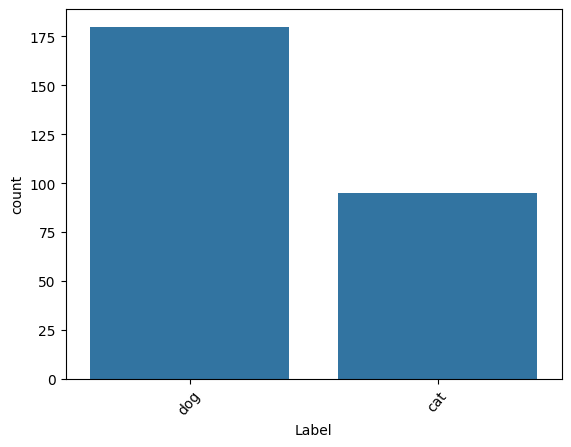

In [25]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [26]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 275 files belonging to 2 classes.
Using 220 files for training.
Found 275 files belonging to 2 classes.
Using 55 files for validation.


In [27]:
class_names = train.class_names
class_names

['cat', 'dog']

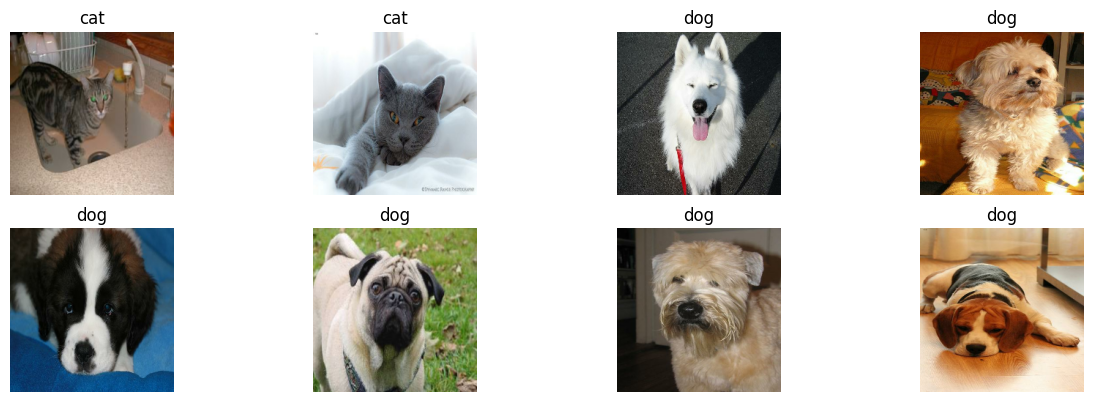

In [28]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [29]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dropout_1 (Dropout)         (None, 62720)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 7056566 (26.92 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


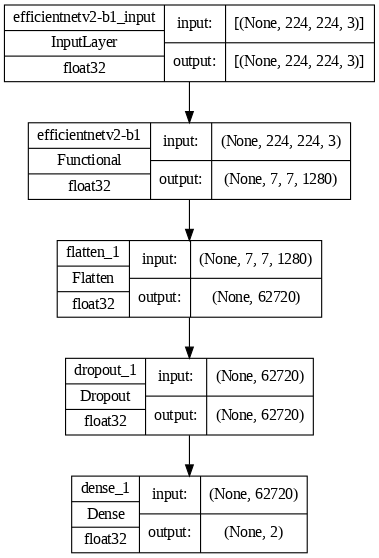

In [30]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [31]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [32]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [33]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=5,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/5
7/7 [==============================] - 43s 4s/step - loss: 0.3267 - accuracy: 0.8727 - val_loss: 0.0537 - val_accuracy: 0.9818
Epoch 2/5
7/7 [==============================] - 27s 4s/step - loss: 0.0215 - accuracy: 0.9955 - val_loss: 0.0284 - val_accuracy: 0.9818
Epoch 3/5
7/7 [==============================] - 28s 4s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 6.5023e-09 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 33s 5s/step - loss: 1.0539e-06 - accuracy: 1.0000 - val_loss: 6.5023e-09 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 23s 3s/step - loss: 5.7978e-07 - accuracy: 1.0000 - val_loss: 1.7340e-08 - val_accuracy: 1.0000


In [34]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,3.266627e-01,0.872727,5.371871e-02,0.981818
1,2.145163e-02,0.995455,2.837548e-02,0.981818
2,1.916611e-03,1.000000,6.502324e-09,1.000000
3,1.053885e-06,1.000000,6.502324e-09,1.000000
4,5.797846e-07,1.000000,1.733953e-08,1.000000


In [35]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 [==============================] - 4s 2s/step - loss: 1.7340e-08 - accuracy: 1.0000
Test Loss = 1.7339527147441913e-08
Test Accuracy = 1.0


In [36]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,3.266627e-01,0.872727,5.371871e-02,0.981818
1,2.145163e-02,0.995455,2.837548e-02,0.981818
2,1.916611e-03,1.000000,6.502324e-09,1.000000
3,1.053885e-06,1.000000,6.502324e-09,1.000000
4,5.797846e-07,1.000000,1.733953e-08,1.000000


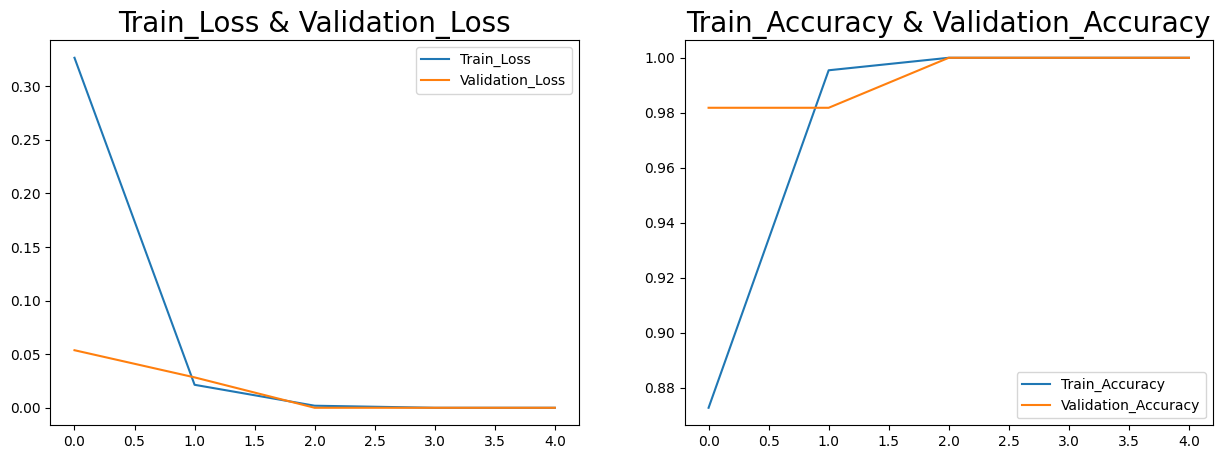

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [38]:
test= tf.keras.preprocessing.image_dataset_from_directory(
    image_test_data,
    image_size=(224,224),
    validation_split=None,
)

Found 70 files belonging to 2 classes.


In [39]:
test_score, test_acc = keras_model.evaluate(test)
print('Test Loss =', test_score)
print('Test Accuracy =', test_acc)

3/3 [==============================] - 15s 2s/step - loss: 0.0135 - accuracy: 0.9857
Test Loss = 0.013486085459589958
Test Accuracy = 0.9857142567634583


In [40]:
Accuracy = [('valid', score, acc),
          ('test', test_score, test_acc)
         ]

predict_test = pd.DataFrame(data = Accuracy, columns=['Model', 'loss', 'accuracy'])
predict_test

,Model,loss,accuracy
0,valid,1.733953e-08,1.000000
1,test,1.348609e-02,0.985714


In [41]:
# prompt: i want to save the model

keras_model.save('catvsdog.h5')


1/1 [==============================] - 0s 178ms/step


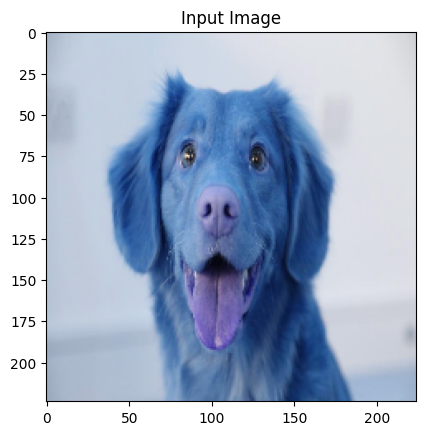

Predicted class: dog


In [47]:
import matplotlib.pyplot as plt
import numpy as np
# Load the image
image_path = '/content/drive/MyDrive/Images/dog.jpg'
image = cv2.imread(image_path)

# Check if the image loaded successfully
if image is None:
    print("Error: Could not load image. Please check the image path.")
else:
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0

    # Add a batch dimension
    image = np.expand_dims(image, axis=0)

    # Make predictions
    predictions = keras_model.predict(image)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    # Print the input image and the predicted class
    plt.imshow(image[0])
    plt.title('Input Image')
    plt.show()
    print('Predicted class:', class_names[predicted_class]) # Make sure 'class_names' is defined
